In [1]:
print('Comparing the kernel (where the executables are) with where things get installed to')
import sys
!jupyter kernelspec list

print('!type python')
!type python
print('sys.executable')
sys.executable

Comparing the kernel (where the executables are) with where things get installed to
Available kernels:
  geo_env       /Users/thomasyoung/Library/Jupyter/kernels/geo_env
  learnflask    /Users/thomasyoung/Library/Jupyter/kernels/learnflask
  nlp_env       /Users/thomasyoung/Library/Jupyter/kernels/nlp_env
  python3       /Users/thomasyoung/opt/anaconda3/share/jupyter/kernels/python3
!type python
python is /Users/thomasyoung/opt/anaconda3/bin/python
sys.executable


'/Users/thomasyoung/opt/anaconda3/envs/geo_env/bin/python'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import descartes

#For creating interactive maps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
reviews = pd.read_csv('./GettingData/reviews_first600cs.csv')
shops = pd.read_csv('./GettingData/mhcoffeeshops_6_4_20_noduplicates.csv')

In [4]:
reviews.head(5)
shops.tail(6)

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude
1525,W_IjOOQq_DnCR4-vYTbd6w,Starbucks,starbucks-new-york-544,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",9,NaN,2.5,[],40.801239,-73.959373
1526,6UC3VpBfm9e7fBZ_EtMMZQ,Dunkin',dunkin-new-york-172,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",3,$,2.0,['delivery'],40.784422,-73.946806
1527,RmTjeENvxCNoubyV6cGPXQ,Dunkin',dunkin-new-york-122,False,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",4,$,3.0,['delivery'],40.792864,-73.943770
1528,Wkr7PphFilgEpHTl8pzmJQ,Don Paco Lopez Panaderia,don-paco-lopez-panaderia-new-york-2,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",1,NaN,5.0,[],40.798140,-73.939650
1529,dcLSAZoQe-2ddDStxIGnDA,Natural Food Deli,natural-food-deli-new-york,False,"[{'alias': 'grocery', 'title': 'Grocery'}, {'a...",3,NaN,3.5,['pickup'],40.799710,-73.938510
1530,jNaVbDtr6aAvRQWjtr9DPw,D & C Coffee,d-and-c-coffee-manhattan,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",1,NaN,5.0,[],40.798850,-73.936650


In [5]:
valcounts = shops.name.value_counts()
storename = valcounts.axes[0].to_list()
for i in zip(storename,valcounts):
    print(i)

('Starbucks', 217)
("Dunkin'", 138)
('Pret A Manger', 51)
("McDonald's", 43)
('7-Eleven', 41)
('Le Pain Quotidien', 26)
('Gregorys Coffee', 25)
('Bluestone Lane', 17)
('Blue Bottle Coffee', 15)
('JOE & THE JUICE', 15)
('Joe Coffee Company', 15)
('Paris Baguette', 14)
('Birch Coffee', 10)
('Matto Espresso', 10)
('Think Coffee', 10)
('Kung Fu Tea', 8)
('La Colombe Coffee', 8)
('Van Leeuwen Ice Cream', 6)
('CoCo Fresh Tea & Juice', 6)
('Ninth Street Espresso', 5)
('Irving Farm New York', 5)
('Maison Kayser', 5)
('Ground Central', 5)
("Oren's Daily Roast", 5)
('Gasoline Alley Coffee', 4)
('Cha Cha Matcha', 4)
('Pret a Manger', 4)
('Financier Patisserie', 4)
('787 Coffee', 4)
('Champion Coffee', 3)
('Caffe Bene', 3)
('Zibetto Espresso Bar', 3)
('Starbucks Reserve', 3)
('Maman', 3)
('DAVIDsTEA', 3)
('Coffee Cart', 3)
('PROOF Coffee Roasters', 3)
("Ralph's Coffee", 3)
('Cafe Grumpy', 3)
('Seven Grams Caffe', 3)
('Le Cafe Coffee', 3)
('Kaffe 1668', 3)
('Doughnut Plant', 3)
('Perk Kafe', 3)
('B

Clearly, McDonald's and 7-11 shouldn't be in the list.  There are other drink related places that don't have anything coffee related in the name that will have to be filtered.  There are also places with ambiguous names, that will have to be checked to see if coffee actually appears in the reviews.

In [6]:
print(shops.shape)
shops = shops[~shops.name.isin(['McDonald\'s','7-Eleven'])]
print(shops.shape)
shops.name.value_counts()

(1531, 11)
(1447, 11)


Starbucks                       217
Dunkin'                         138
Pret A Manger                    51
Le Pain Quotidien                26
Gregorys Coffee                  25
                               ... 
Blank Slate Coffee + Kitchen      1
Frenchy Coffee NYC                1
Peaky Barista                     1
BAMBU                             1
I’Milky 沐白                        1
Name: name, Length: 738, dtype: int64

In [7]:
shops.longitude

0      -73.988610
1      -73.997140
2      -73.999004
3      -73.996326
4      -73.989576
          ...    
1526   -73.946806
1527   -73.943770
1528   -73.939650
1529   -73.938510
1530   -73.936650
Name: longitude, Length: 1447, dtype: float64

In [8]:
#Let's look at the distribution of the coffee shops on a map
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


In [9]:
full_data = gpd.read_file("./BoroughBoundaries/geo_export_95c5197b-fade-4aaa-afbb-4566e043f401.shp")

In [10]:
#The map has crs = epsg:4326
full_data.head(10)
type(full_data)
print(full_data.total_bounds)
print(full_data.crs)


[-74.25559136  40.4961154  -73.70000906  40.91553278]
epsg:4326


Plotting the coffee related businesses on the map

In [11]:
ax = full_data.plot(figsize=(10,10),color='none',edgecolor='gainsboro')
ax.set_xlim(-74.03, -73.925)
ax.set_ylim(40.7, 40.85)

crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(shops.longitude, shops.latitude)]
shopsgdf = gpd.GeoDataFrame(shops,geometry=geometry)
shopsgdf.crs = crs
shopsgdf.plot(color='maroon',markersize=1,ax=ax)
#ax.set_title('Coffeeshop dataset')

/Users/thomasyoung/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Most coffee related businesss are cheap

$$      0.509466
$       0.475043
$$$     0.013769
$$$$    0.001721
Name: price, dtype: float64

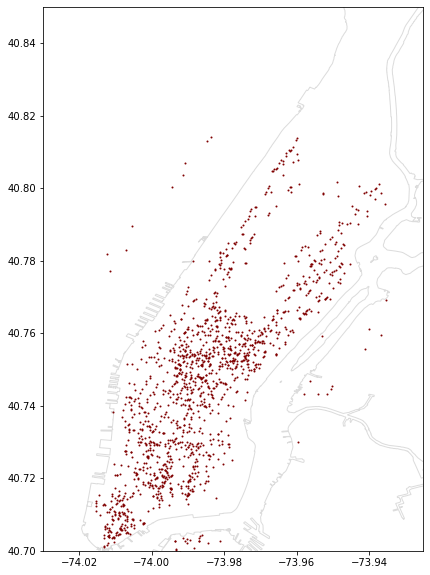

In [12]:
shops.price.value_counts()/sum(shops.price.value_counts())

About 45% have an average rating > 4. 60% have a rating over 3.5.

In [13]:
shops.rating.value_counts().sort_index()/sum(shops.rating.value_counts())

1.0    0.011057
1.5    0.013131
2.0    0.060815
2.5    0.123013
3.0    0.134070
3.5    0.165169
4.0    0.270214
4.5    0.159641
5.0    0.062889
Name: rating, dtype: float64

All shops are opened

In [14]:
shops.is_closed.value_counts()

False    1447
Name: is_closed, dtype: int64

There is a single peak for number of yelp reviews at about 120.  THis is the average.  There is some skew in the tail

126.90808569454043

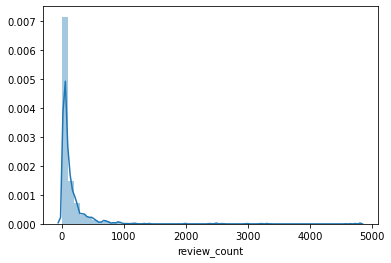

In [15]:
sns.distplot(shops.review_count)
np.mean(shops.review_count)


As expected from statistics, when there are fewere reviews, there is more variability in the average rating. At the same we we would expected more reviews to correlate with higher ratings, since higher ratings can help to drive business.

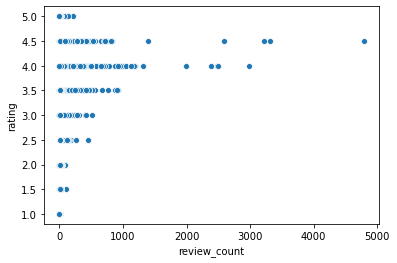

In [16]:
sns.scatterplot(x=shops.review_count,y=shops.rating)

Creating an interactive map with folium

In [17]:
#Plotting individual coffeeshops color coded by review

In [18]:
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13)

#add shops to the map, color coded by price

def color_producer(val):
    if val == '$':
        return 'yellow'
    if val == '$$':
        return 'darkred'
    if val == '$$$':
        return 'black'
    if val == '$$$$':
        return 'blue'
    
for i in range(0,len(shops)):
    Circle(
        location=[shops.iloc[i]['latitude'],shops.iloc[i]['longitude']],
        radius = 20, 
        color = color_producer(shops.iloc[i]['price'])).add_to(m_1)
    
#display the map
m_1



In [19]:
shops.head(10)

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry
0,lWOkeS-wV4no8qqA9OwwEg,Doughnut Plant,doughnut-plant-new-york-6,False,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",3213,$$,4.5,"['pickup', 'delivery']",40.716394,-73.988610,POINT (-73.98861 40.71639)
1,UZViRVpxNZvOM5KarmbT1g,Sweet Moment,sweet-moment-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",822,$$,4.5,[],40.717630,-73.997140,POINT (-73.99714 40.71763)
2,nOCjslrdcKBQQYgD5qUs9Q,Kam Hing Coffee Shop,kam-hing-coffee-shop-new-york-2,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",645,$,4.5,[],40.718248,-73.999004,POINT (-73.99900 40.71825)
3,hGo9KArKThuOKxNbwmNpoA,Ruby's Cafe,rubys-cafe-new-york-2,False,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",1190,$$,4.0,"['pickup', 'delivery']",40.722329,-73.996326,POINT (-73.99633 40.72233)
4,0rQz8mkleT62eUkiAVs4UA,Russ & Daughters Cafe,russ-and-daughters-cafe-new-york-5,False,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",1004,$$,4.0,[],40.719625,-73.989576,POINT (-73.98958 40.71963)
5,PWsU_ORsfcjeeUqocm9vQg,Petee's Pie Company,petees-pie-company-new-york,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",743,$,4.5,"['pickup', 'delivery']",40.719216,-73.991282,POINT (-73.99128 40.71922)
6,OiqGAhC5EQXb1CaNxxvfBQ,Harney & Sons SoHo,harney-and-sons-soho-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",734,$$,4.5,[],40.721440,-73.999401,POINT (-73.99940 40.72144)
7,ikazsJps1k-Br2FbunwCtg,Spot Dessert Bar,spot-dessert-bar-new-york-2,False,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",2981,$$,4.0,"['pickup', 'delivery']",40.729390,-73.988920,POINT (-73.98892 40.72939)
8,AYjVpQ5jYz5gJJqXh_B_CA,Teado Tea Shop,teado-tea-shop-new-york-6,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",349,$,4.5,[],40.717214,-73.994962,POINT (-73.99496 40.71721)
9,8zIXMsbcDS7kqH8N-09zLg,Cha Cha Matcha,cha-cha-matcha-new-york-8,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",907,$$,4.0,[],40.720066,-73.996261,POINT (-73.99626 40.72007)


    Looking at whether there are chains, how common they are

In [20]:
print(shops.name.value_counts().head(30))

Starbucks                 217
Dunkin'                   138
Pret A Manger              51
Le Pain Quotidien          26
Gregorys Coffee            25
Bluestone Lane             17
Blue Bottle Coffee         15
JOE & THE JUICE            15
Joe Coffee Company         15
Paris Baguette             14
Think Coffee               10
Birch Coffee               10
Matto Espresso             10
Kung Fu Tea                 8
La Colombe Coffee           8
Van Leeuwen Ice Cream       6
CoCo Fresh Tea & Juice      6
Ninth Street Espresso       5
Irving Farm New York        5
Maison Kayser               5
Ground Central              5
Oren's Daily Roast          5
Gasoline Alley Coffee       4
Cha Cha Matcha              4
Financier Patisserie        4
Pret a Manger               4
787 Coffee                  4
Champion Coffee             3
Caffe Bene                  3
Zibetto Espresso Bar        3
Name: name, dtype: int64


Based on the names, it looks like for some businesses, coffee is one of several focuses (Van Leeuwen Ice Cream and 7-eleven).  W
One related factor is the category of a shop. It tells roughly what the shop sells. A propsective coffee shop owner might be curious whether selling coffee with something else is common in a particular area.  That migh be something to account for in a particular area. We can use the number of factors to assess what places are truly coffee shops.

In [21]:
print(shops.categories.head(1))

0    [{'alias': 'donuts', 'title': 'Donuts'}, {'ali...
Name: categories, dtype: object


In [22]:
categorylists = shops.categories.str.findall(r"(?<='alias': )\'(\w+)\'")

In [23]:
categorylists.value_counts().head(45)

[coffee]                                    490
[donuts, coffee]                             92
[coffee, donuts]                             58
[coffee, bakeries]                           38
[sandwiches, coffee, breakfast_brunch]       35
[coffee, breakfast_brunch, sandwiches]       23
[coffee, coffeeroasteries]                   21
[bakeries, coffee]                           18
[coffee, sandwiches, breakfast_brunch]       17
[coffee, sandwiches]                         16
[coffee, breakfast_brunch]                   13
[cafes, coffee]                              11
[bakeries, coffee, cakeshop]                 10
[bakeries, breakfast_brunch, coffee]         10
[coffee, gluten_free, breakfast_brunch]      10
[bakeries, coffee, sandwiches]               10
[bakeries, coffee, breakfast_brunch]          9
[coffee, juicebars]                           8
[bubbletea, coffee, juicebars]                8
[coffee, cafes]                               8
[cafes, coffee, juicebars]              

In [24]:
#sorting each list
for element in categorylists:
    element.sort()


In [23]:
print(categorylists.value_counts().head(60))


[coffee]                                    490
[coffee, donuts]                            150
[breakfast_brunch, coffee, sandwiches]       78
[bakeries, coffee]                           56
[burgers, coffee, hotdogs]                   43
[coffee, convenience]                        42
[bakeries, breakfast_brunch, coffee]         37
[bakeries, coffee, desserts]                 26
[coffee, coffeeroasteries]                   24
[bubbletea, coffee, juicebars]               22
[cafes, coffee, juicebars]                   21
[bakeries, coffee, sandwiches]               19
[cafes, coffee]                              19
[coffee, sandwiches]                         18
[bakeries, cakeshop, coffee]                 18
[breakfast_brunch, coffee, gluten_free]      16
[breakfast_brunch, coffee]                   14
[cafes, coffee, coffeeroasteries]            11
[bagels, breakfast_brunch, coffee]           11
[coffee, salad, sandwiches]                  10
[bakeries, cafes, coffee]               

In [25]:
shops['catlist'] = categorylists

In [26]:
shops[100:105]

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry,catlist
100,pGG-xx11-06m5lsyzk2k-Q,Porto Rico Importing Co,porto-rico-importing-co-new-york-3,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",205,$,4.5,[],40.728312,-73.987300,POINT (-73.98730 40.72831),"[candy, coffee]"
101,HSW4iLqHCBNRttXC1IemaQ,Boris & Horton,boris-and-horton-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",178,$$,4.5,[],40.729260,-73.981380,POINT (-73.98138 40.72926),"[breakfast_brunch, coffee, petadoption]"
102,DxeD4Jw3gsImI-olCOB0bA,Little Canal,little-canal-new-york-2,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",115,$,4.0,"['pickup', 'delivery']",40.714309,-73.990417,POINT (-73.99042 40.71431),"[breakfast_brunch, coffee, wine_bars]"
103,p6Xo2vQlKv-w3X1r42CkVQ,Think Coffee,think-coffee-new-york-2,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",678,$,3.5,[],40.728339,-73.995287,POINT (-73.99529 40.72834),[coffee]
104,r9wwILW7TAfvLq-akfT0CQ,T2,t2-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",52,$$,4.5,[],40.723928,-73.996708,POINT (-73.99671 40.72393),[coffee]


In [27]:
shops[shops.name=='Paris Baguette']

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry,catlist
305,RBNHu3wX_MNoWFzSRB0_-A,Paris Baguette,paris-baguette-new-york-14,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",58,$$,3.5,[],40.732239,-73.981620,POINT (-73.98162 40.73224),"[bakeries, cakeshop, coffee]"
624,SLrIiJMqIOdN5KNYpinINQ,Paris Baguette,paris-baguette-new-york-2,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",699,$$,4.0,[],40.747380,-73.986270,POINT (-73.98627 40.74738),"[bakeries, cakeshop, coffee]"
657,97zuXSmmdJw5mE1HVB5JaQ,Paris Baguette,paris-baguette-new-york-4,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",338,$$,4.0,[],40.754930,-73.987540,POINT (-73.98754 40.75493),"[bakeries, cakeshop, coffee]"
775,C6GOh4ebry81vuG_765VvA,Paris Baguette,paris-baguette-new-york-25,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",14,$$,4.5,[],40.755115,-73.986727,POINT (-73.98673 40.75512),"[bakeries, cakeshop, coffee]"
782,6kxVXIjqxCe4bJsFIrVfZA,Paris Baguette,paris-baguette-new-york-29,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",11,NaN,4.0,[],40.751296,-73.986232,POINT (-73.98623 40.75130),"[bakeries, cakeshop, coffee]"
789,9dqJrTzx0GvBNb-J0VyeGg,Paris Baguette,paris-baguette-new-york-27,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",11,$,3.0,[],40.742500,-73.992870,POINT (-73.99287 40.74250),"[bakeries, cakeshop, coffee]"
842,o4cGL9MUpfdl_CjhDYoYkw,Paris Baguette,paris-baguette-new-york-30,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",6,NaN,3.5,[],40.748850,-73.991970,POINT (-73.99197 40.74885),"[bakeries, cakeshop, coffee]"
975,bXwYrfKJxAoEIvulX3TVcA,Paris Baguette,paris-baguette-new-york-6,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",203,$$,3.5,[],40.757498,-73.971389,POINT (-73.97139 40.75750),"[bakeries, cakeshop, coffee]"
1027,r7YK3w8pLkWwnDGLRRcH1w,Paris Baguette,paris-baguette-new-york-10,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",86,$$,3.5,[],40.767010,-73.982760,POINT (-73.98276 40.76701),"[bakeries, cakeshop, coffee]"
1221,Zu3GvWlGyxHr93Pwy16_nQ,Paris Baguette,paris-baguette-new-york-31,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",2,NaN,5.0,[],40.769559,-73.987829,POINT (-73.98783 40.76956),"[bakeries, cakeshop, coffee]"


In [27]:
shops.to_csv('./ProcessedData/shops_withcategoriesgeoms.csv',index=False)

I only have 225 reviews, despite running through the first 600 shops in shops.alias

In [28]:
reviews.alias.value_counts().shape

(225,)

In [29]:
shops.alias.value_counts().shape

(1531,)

In [30]:
reviews.alias.value_counts().sort_values()

dripped-coffee-new-york                 14
partybus-bakeshop-new-york              15
office-coffee-new-york-2                19
the-lazy-llama-coffee-bar-new-york-2    20
porto-rico-importing-co-new-york-3      20
                                        ..
landmark-coffee-shop-new-york           20
cha-cha-matcha-new-york-13              20
rubys-cafe-new-york-2                   20
ole-and-steen-new-york                  20
prodigy-coffee-new-york-2               20
Name: alias, Length: 225, dtype: int64

Let's try to understand why there are reviews for only 225 coffee shops when the yelp scraping script said the 600 coffee shops were passed through.

In [31]:
print(reviews.iloc[[i for i in range(1,200,10)],1])
print(shops.head(10))

1               doughnut-plant-new-york-6
11              doughnut-plant-new-york-6
21                  sweet-moment-new-york
31                  sweet-moment-new-york
41        kam-hing-coffee-shop-new-york-2
51        kam-hing-coffee-shop-new-york-2
61                  rubys-cafe-new-york-2
71                  rubys-cafe-new-york-2
81     russ-and-daughters-cafe-new-york-5
91     russ-and-daughters-cafe-new-york-5
101           petees-pie-company-new-york
111           petees-pie-company-new-york
121         harney-and-sons-soho-new-york
131         harney-and-sons-soho-new-york
141           spot-dessert-bar-new-york-2
151           spot-dessert-bar-new-york-2
161             teado-tea-shop-new-york-6
171             teado-tea-shop-new-york-6
181             cha-cha-matcha-new-york-8
191             cha-cha-matcha-new-york-8
Name: alias, dtype: object
                       id                   name  \
0  lWOkeS-wV4no8qqA9OwwEg         Doughnut Plant   
1  UZViRVpxNZvOM5KarmbT1g    

In [32]:
reviews.alias.iloc[[4408,4418,4428,4438,4448,4458,4468,4478,4487]]

4408    merriweather-coffee-kitchen-new-york
4418    merriweather-coffee-kitchen-new-york
4428              red-fleece-cafe-new-york-3
4438              red-fleece-cafe-new-york-3
4448                     cranberrys-brooklyn
4458                     cranberrys-brooklyn
4468                  ole-and-steen-new-york
4478                  ole-and-steen-new-york
4487                  ole-and-steen-new-york
Name: alias, dtype: object

In [33]:
shops[shops.alias =='ole-and-steen-new-york']

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry,catlist
224,K2d_jyiym-61tHTFeHrk2g,Ole & Steen,ole-and-steen-new-york,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",161,NaN,4.0,[],40.73802,-73.99022,POINT (-73.99022 40.73802),"[bakeries, breakfast_brunch, coffee]"


In [34]:
reviews.reviewtxt[4483]

'This is a cute bakery with tons of artisan made breads and baked goods.'

In [35]:
reviews = pd.read_csv('./GettingData/reviews_first600cs.csv')
aliases = reviews.drop_duplicates(['alias']).alias
aliases = aliases.reset_index(drop = True)
aliases.head(5)
aliases.shape
aliases.head(5)

0             doughnut-plant-new-york-6
1                 sweet-moment-new-york
2       kam-hing-coffee-shop-new-york-2
3                 rubys-cafe-new-york-2
4    russ-and-daughters-cafe-new-york-5
Name: alias, dtype: object

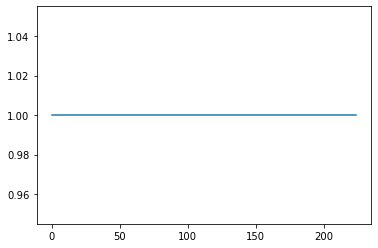

In [36]:
shopaliases = shops.alias[0:225].reset_index(drop=True)
shopaliases.shape
plt.plot(shopaliases == aliases)

It looks like scraping worked fine for the first 225 coffee shops in the list and then stopped working.

In [37]:
shops[shops.name=="The Granddaddy"]

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry,catlist
89,18-qEPtsL2lbZH4ianmicg,The Granddaddy,the-granddaddy-new-york-2,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",111,$$,4.0,[],40.71782,-73.992,POINT (-73.99200 40.71782),[coffee]


In [42]:
reviews.reviewtxt[reviews.alias=='the-granddaddy-new-york-2'][1780]

'Always on the hunt for a good latte while in NYC. With reviewers raving about their Black Sesame lattes, I had to come in to try one.'

In [45]:
shops.iloc[[225],:]

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry,catlist
225,RTA_esY_iOwFe3qyNzHeLQ,BIN No. 220,bin-no-220-new-york,False,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",83,$$,4.0,[],40.70761,-74.00236,POINT (-74.00236 40.70761),"[coffee, sportsbars, wine_bars]"
